In [67]:
import numpy as np
import mocalum as mc
from mocalum import plot_mocalum_setup, spher2cart
import matplotlib.pyplot as plt

import xarray as xr
from numpy.linalg import inv as inv


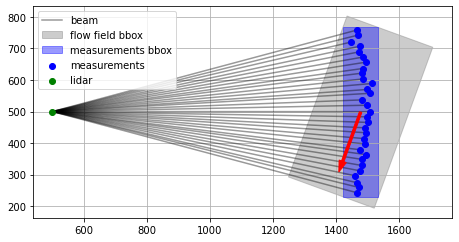

In [181]:
koshava_xyz = [500, 500, 0]
no_scans = 1000
# wind field setup
ref_height = 100      # power law reference height
meas_height = 100 
shear_exponent = 0.2  # power law shear exponent
wind_speed = 8       # wind speed at referenec height
wind_dir = 20 # wind direction
w = 0 

# beam steering setup
distance = 1000   # meter
elevation = np.degrees(np.arcsin(meas_height / distance))
angular_res = 1   # degree
azimuth_mid = 90  # central azimuth angle
sector_size = 30  # degree
scan_speed = 1    # degree.s^-1
max_speed = 50    # degree.s^-1
max_acc = 100     # degree.s^-2

# Uncertainty terms
no_sim = 10000 # number of simulations
corr_coef = 0  # correlation coefficient
mu = 0         # we assume no systematic uncertainty
azim_std = 0.1 # degrees
elev_std = 0.1 # degrees
dis_std = 10   # meters
rad_std = 0.1  # m.s-1  In [23]:  

tmp = mc.Mocalum()

tmp.set_ivap_probing(koshava_xyz, sector_size, azimuth_mid, angular_res, elevation, distance, 
                    no_scans, scan_speed, max_speed,max_acc)

tmp.gen_unc_contributors(corr_coef)


# tmp.x_res = tmp.y_res = 25
# tmp.z_res = 5
# tmp.turbbox_time = 600

tmp.gen_turb_ffield(wind_speed, wind_dir, w, ref_height, shear_exponent)

plot_mocalum_setup(tmp)

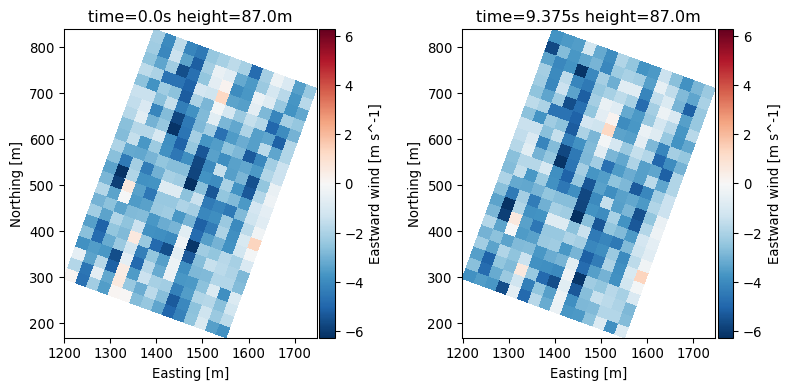

In [182]:
width_px = height_px = 400 # resolution of plots
MY_DPI = 96
fig, axes = plt.subplots(ncols=2, figsize=(2*width_px/MY_DPI, height_px/MY_DPI), dpi=MY_DPI)

i=0

j=k=0
cs = tmp.data.ffield.u.isel(z=i,time=j).plot.pcolormesh('Easting','Northing',ax=axes[k],add_colorbar=False)
cbar = plt.colorbar(cs,orientation='vertical', fraction=0.07, pad=0.01,ax=axes[k])
axes[k].set_title('time=' + str(tmp.data.ffield.time[i].values) + 's' 
                  + ' height=' + str(np.round(tmp.data.ffield.z[j].values)) + 'm')

cbar.set_label('Eastward wind [m s^-1]', fontsize = 10)


j=3
k=1
cs = tmp.data.ffield.u.isel(z=i,time=j).plot.pcolormesh('Easting','Northing',ax=axes[k],add_colorbar=False)
cbar = plt.colorbar(cs,orientation='vertical', fraction=0.07, pad=0.01,ax=axes[k])
axes[k].set_title('time=' + str(tmp.data.ffield.time[j].values) + 's' 
                  + ' height=' + str(np.round(tmp.data.ffield.z[i].values)) + 'm')


cbar.set_label('Eastward wind [m s^-1]', fontsize = 10)

plt.tight_layout()
plt.subplots_adjust(wspace=0.45, hspace=-0.55)
plt.show()
fig.savefig('/Users/niva/Desktop/grid_plot.png', bbox_inches='tight')

In [183]:
tmp.data.ffield

<xarray.Dataset>
Dimensions:   (time: 171, x: 23, y: 15, z: 7)
Coordinates:
  * time      (time) float64 0.0 3.125 6.25 9.375 ... 521.9 525.0 528.1 531.2
  * y         (y) float64 -1.387e+03 -1.362e+03 ... -1.062e+03 -1.037e+03
  * z         (z) float64 86.55 91.55 96.55 101.5 106.5 111.5 116.5
  * x         (x) float64 702.0 727.0 752.0 ... 1.202e+03 1.227e+03 1.252e+03
    Easting   (x, y) float64 1.544e+03 1.52e+03 ... 1.426e+03 1.403e+03
    Northing  (x, y) float64 185.2 193.7 202.3 210.8 ... 796.0 804.6 813.1 821.7
    Height    (z) float64 86.55 91.55 96.55 101.5 106.5 111.5 116.5
Data variables:
    u         (time, z, y, x) float64 -3.778 -1.623 -1.18 ... 0.1814 0.3863
    v         (time, z, y, x) float64 -8.537 -8.049 -7.462 ... -6.415 -5.999
    w         (time, z, y, x) float64 -0.6906 -0.433 -0.3304 ... 1.638 0.524
Attributes:
    generator:  PyConTurb
    title:      Turbulent flow field dataset